In [35]:
# Necessary imports for the assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

# Homework 1
### By Andrei Stefan 

## Exercise 1: CLT
In order to reproduce the results for the assignment, we define the generator for $Z$ as the sum of $n$ random Bernoulli variables. The results have been plotted below and match the ones on the slide.

In [56]:

class ZBernoulli:
    def __init__(self,n,p):
        self.n=n
        self.p=p
        
    def get(self):
        return (np.sum(np.random.binomial(size=n,p=self.p, n=1)) - n*p)/np.sqrt(n*p*(1-p))
    
class ZUniform:
    def __init__(self,n):
        self.n=n
        
    def get(self):
        return (np.sum(np.random.uniform(0,1, size=n))-self.n/2)/np.sqrt(n/12)
        

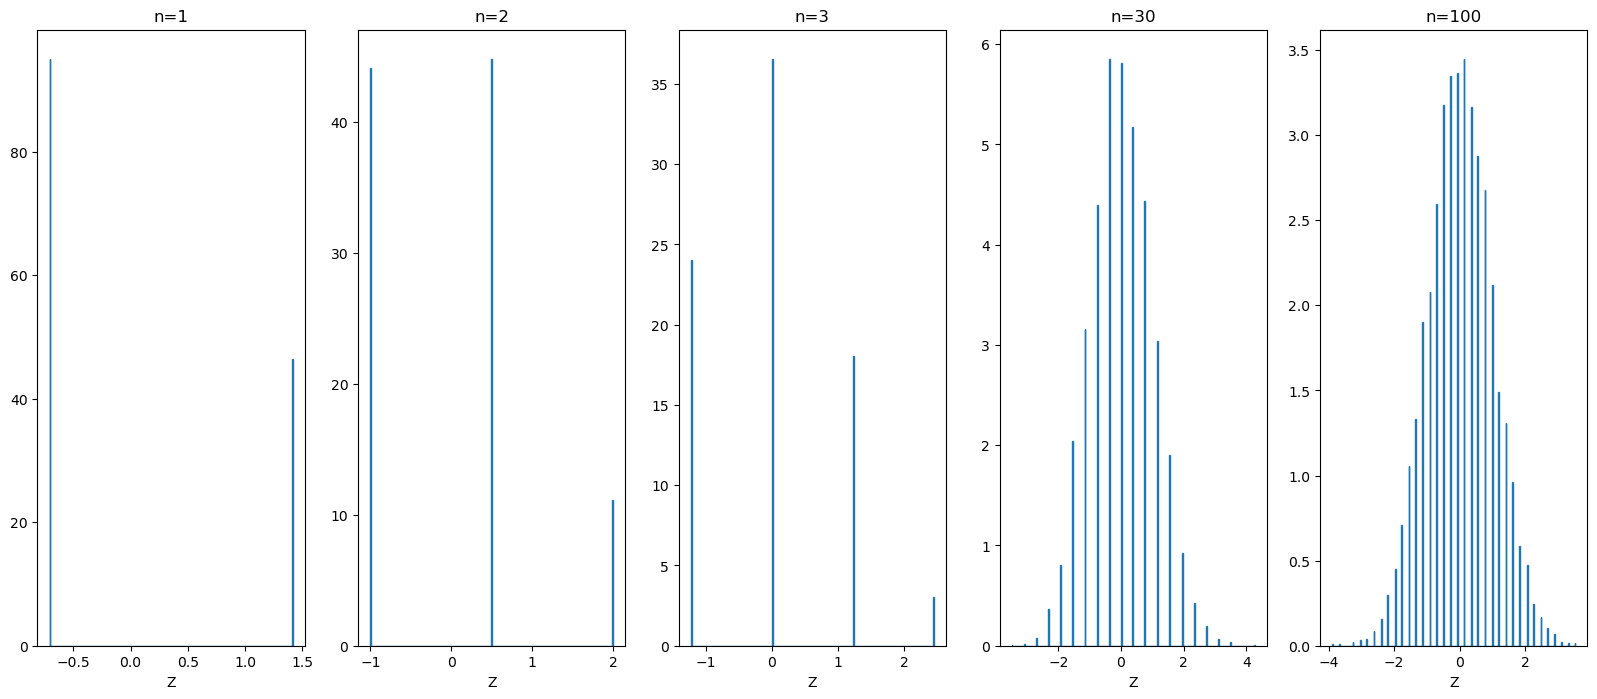

In [61]:
arr = [1,2,3,30,100]
m = 10000
p = 1/3
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZBernoulli(n,p)
    zs = []
    for i in range(m):
        zs.append(z.get())
    #print(arr)
    
    zs.sort()
    vals.append(zs)
    axs[ix].hist(zs, bins=300, density=True, histtype='step')
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')
    
#print(vals)    
plt.show()

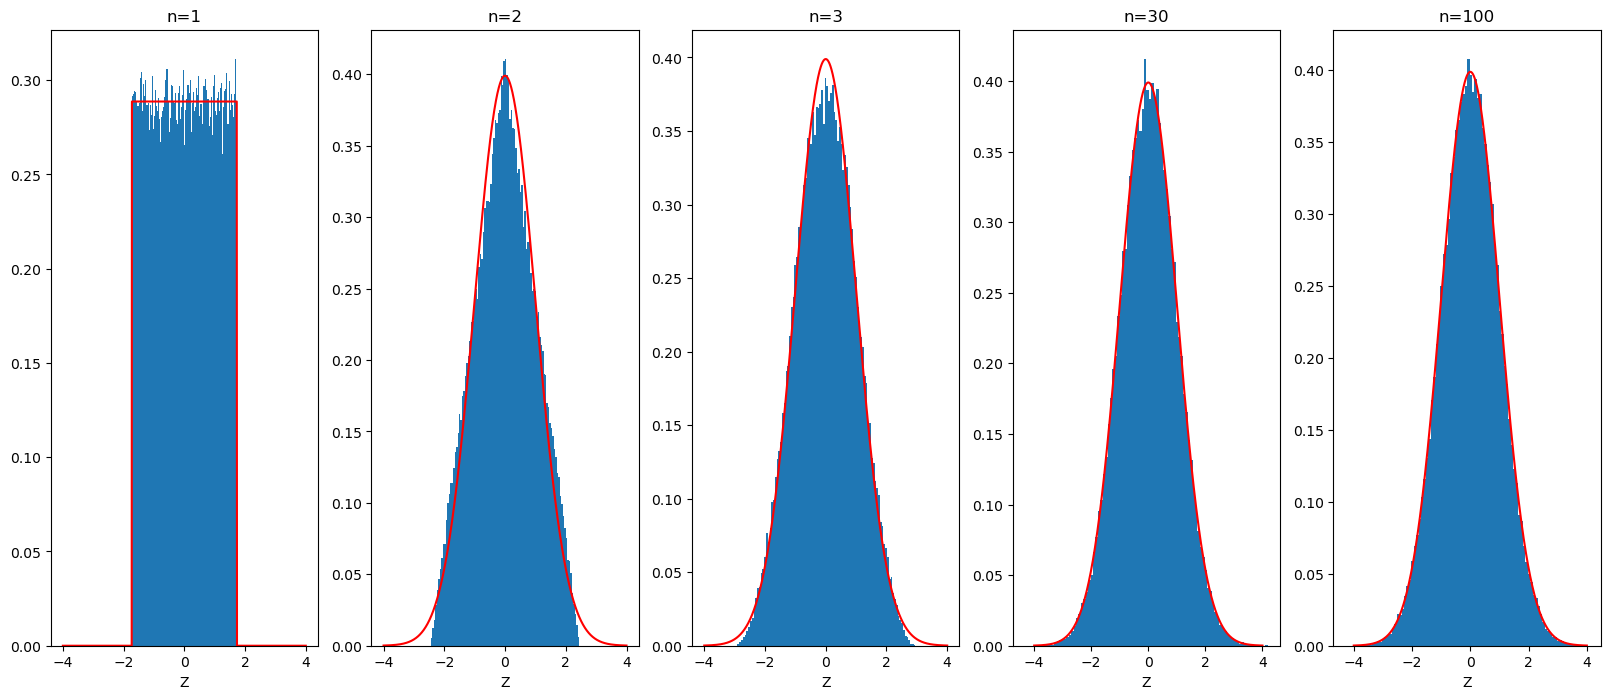

In [38]:
arr = [1,2,3,30,100]
m = 100000
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZUniform(n)
    zs = []
    for i in range(m):
        zs.append(z.get())
    #print(arr)
    
    zs.sort()
    vals.append(zs)
    
    x = np.linspace(-4, 4, 1000)
    pdf = stats.norm.pdf(x, 0,1)
    u_pdf = stats.uniform.pdf(x, -np.sqrt(3), 2*np.sqrt(3))
    if n==1:
        axs[ix].plot(x, u_pdf, 'r')
    else:
        axs[ix].plot(x, pdf, 'r')
    axs[ix].hist(zs, bins=100, density=True)
    
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')

## Exercise 2

### Subtask a)

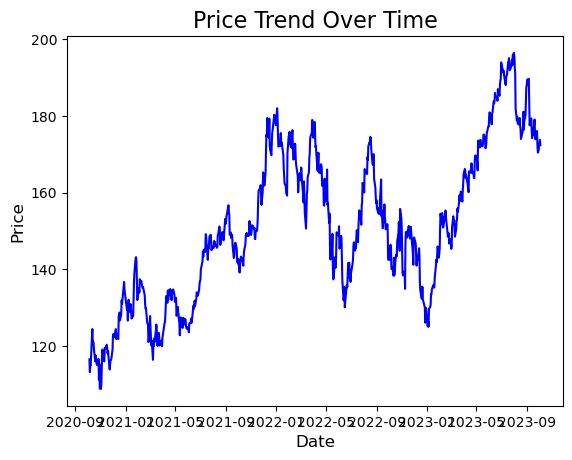

In [39]:
daily_data = pd.read_csv("data/DailyData - STOCK_US_XNAS_AAPL.csv")
#print(daily_data)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)
plt.title('Price Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(daily_data.index, daily_data.Close, linestyle='-', color='b', label='Price')
plt.show()


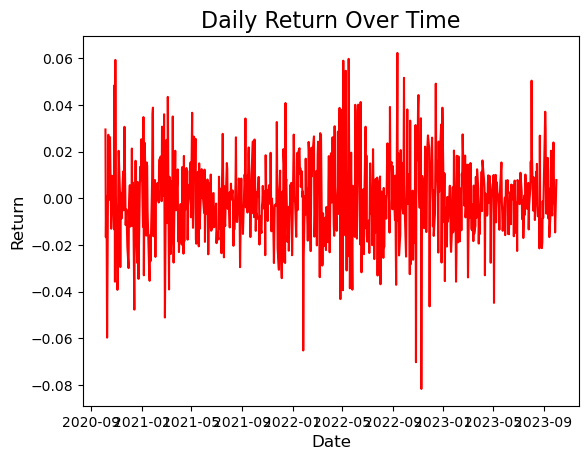

In [40]:
# plot daily return
daily_data['Return'] = daily_data['Close'].pct_change()
plt.title('Daily Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.plot(daily_data.index, daily_data.Return, linestyle='-', color='r', label='Return')
plt.show()

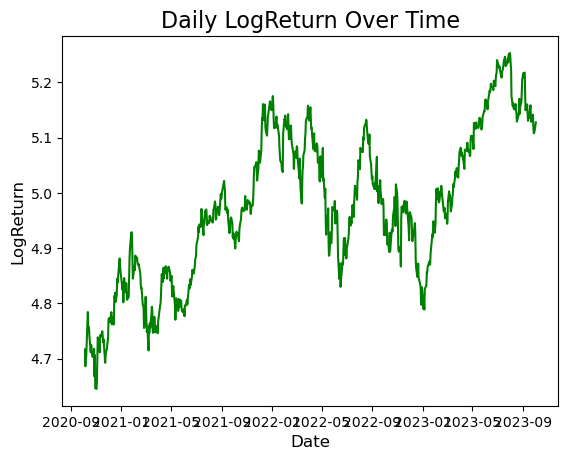

In [41]:
# plot daily logreturn
daily_data['LogReturn'] = np.log(daily_data['Close'] - np.log(daily_data['Close'].shift(1)))
plt.title('Daily LogReturn Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('LogReturn', fontsize=12)
plt.plot(daily_data.index, daily_data.LogReturn, linestyle='-', color='g', label='LogReturn')
plt.show()

The daily return and daily log return can be assumed to be equal when the returns are small, for which we can approximate $$\ln(\frac{S_{x}}{S_x-1}) \approx \frac{S_{x}-S{x-1}}{S_{x-1}}$$

### Subtask b)

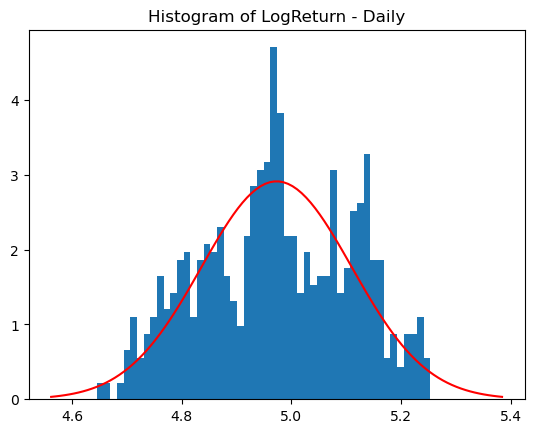

Mean of LogReturn:  4.972848746750936
Variance of LogReturn:  0.018785953436489842


In [42]:
mean = daily_data.LogReturn.mean()
variance = daily_data.LogReturn.var()
stddev = np.sqrt(variance)


plt.hist(daily_data.LogReturn, bins=50, density = True)
plt.title("Histogram of LogReturn - Daily")
x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()



print("Mean of LogReturn: ", mean)
print("Variance of LogReturn: ", variance)


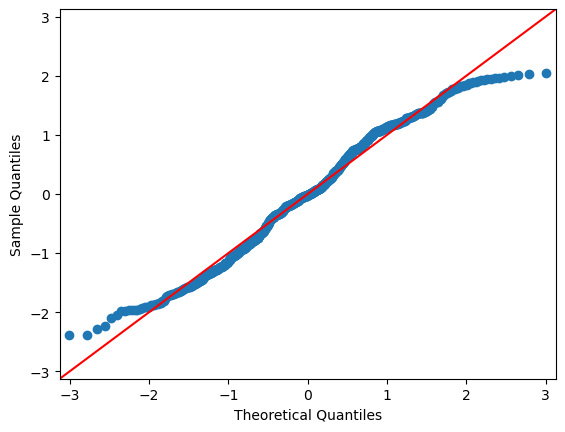

In [43]:
foo = daily_data['LogReturn']
foo = foo.dropna()
#print(foo)
fig = sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

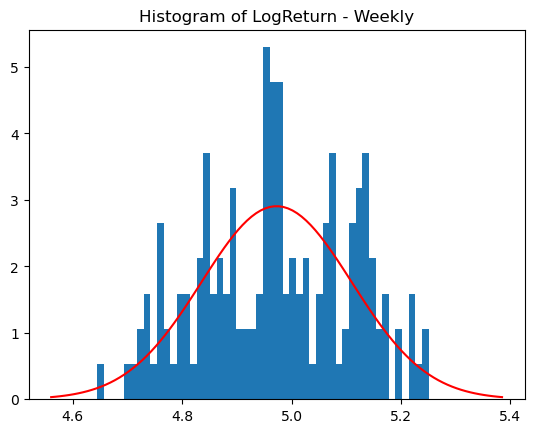

In [44]:
weekly_data = pd.read_csv("data/WeeklyData - STOCK_US_XNAS_AAPL.csv")
# print(daily_data)
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
weekly_data.set_index('Date', inplace=True)
weekly_data['LogReturn'] = np.log(weekly_data['Close'] - np.log(weekly_data['Close'].shift(1)))


plt.hist(weekly_data.LogReturn, bins=50, density = True)
plt.title("Histogram of LogReturn - Weekly")

mean = weekly_data.LogReturn.mean()
variance = weekly_data.LogReturn.var()
stddev = np.sqrt(variance)

x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()


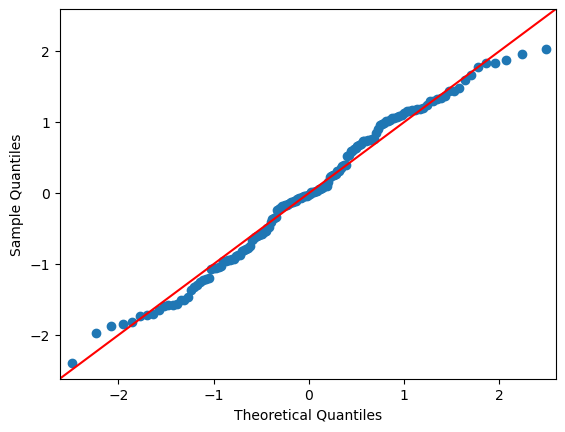

In [45]:
foo = weekly_data['LogReturn']
foo = foo.dropna()
#print(foo)
sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

The daily data in this case seems to follow the normal distribution more closely than the weekly data. This could be because of the fact that the daily data has more data points and thus the Central Limit Theorem applies more closely. The weekly data has less data points and thus the distribution is not as close to the normal distribution. 

### Subtask c)